In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, confusion_matrix, classification_report,
                             ConfusionMatrixDisplay, RocCurveDisplay)

In [3]:
train_df = pd.read_pickle("train.pkl")
test_df = pd.read_pickle("test.pkl")

In [4]:
X_train = train_df.drop("label", axis=1)
y_train = train_df["label"]

X_test = test_df.drop("label", axis=1)
y_test = test_df["label"]

In [5]:
n_runs = 20

In [6]:
from sklearn.ensemble import VotingClassifier

# Pipeline com SMOTE e um VotingClassifier composto por três MLPs
pipeline_mlp_ensemble = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('mlp_ensemble', VotingClassifier(
        estimators=[
            ('mlp1', MLPClassifier(hidden_layer_sizes=(50,50), random_state=42)),
            ('mlp2', MLPClassifier(hidden_layer_sizes=(100,), random_state=42)),
            ('mlp3', MLPClassifier(hidden_layer_sizes=(50,30), random_state=42))
        ],
        voting='soft'  # 'soft' utiliza médias das probabilidades; 'hard' utiliza voto majoritário
    ))
])

# Espaço de hiperparâmetros para o VotingClassifier
param_dist_ensemble = {
    'mlp_ensemble__mlp1__alpha': [1e-3, 1e-2],
    'mlp_ensemble__mlp2__alpha': [1e-3, 1e-2],
    'mlp_ensemble__mlp3__alpha': [1e-3, 1e-2],
    'mlp_ensemble__voting': ['hard', 'soft']
}

# Configurando a validação cruzada estratificada (k=5)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [7]:
best_scores_ensemble = []         # Armazena o F1 no teste de cada rodada
best_params_ensemble = []         # Armazena os melhores hiperparâmetros de cada rodada
cv_results_history_ensemble = []  # Armazena o histórico do cv_results_ de cada rodada

for i in range(n_runs):
    print(f"\nRodada {i+1}/{n_runs}")
    
    ensemble_search = RandomizedSearchCV(
        estimator=pipeline_mlp_ensemble,
        param_distributions=param_dist_ensemble,
        n_iter=3,                  # 3 iterações por rodada
        scoring='f1_macro',         # Métrica principal
        cv=cv,
        random_state=42 + i,        # Variando a semente para cada rodada
        n_jobs=-1,
        verbose=1
    )
    
    ensemble_search.fit(X_train, y_train)
    
    # Armazenando os resultados da validação cruzada
    cv_results = pd.DataFrame(ensemble_search.cv_results_)
    cv_results_history_ensemble.append(cv_results)
    
    # Avaliação no conjunto de teste
    best_model_ensemble = ensemble_search.best_estimator_
    y_pred_test = best_model_ensemble.predict(X_test)
    f1_test = f1_score(y_test, y_pred_test, average='macro')
    
    best_scores_ensemble.append(f1_test)
    best_params_ensemble.append(ensemble_search.best_params_)
    
    print("Melhores hiperparâmetros:", ensemble_search.best_params_)
    print("Melhor F1 (validação cruzada - média):", ensemble_search.best_score_)
    print("F1 no Teste:", f1_test)



Rodada 1/20
Fitting 5 folds for each of 3 candidates, totalling 15 fits


c:\Users\iantr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Melhores hiperparâmetros: {'mlp_ensemble__voting': 'soft', 'mlp_ensemble__mlp3__alpha': 0.001, 'mlp_ensemble__mlp2__alpha': 0.01, 'mlp_ensemble__mlp1__alpha': 0.001}
Melhor F1 (validação cruzada - média): 0.9537566524166081
F1 no Teste: 0.9494636361303599

Rodada 2/20
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Melhores hiperparâmetros: {'mlp_ensemble__voting': 'soft', 'mlp_ensemble__mlp3__alpha': 0.01, 'mlp_ensemble__mlp2__alpha': 0.01, 'mlp_ensemble__mlp1__alpha': 0.01}
Melhor F1 (validação cruzada - média): 0.954072840791112
F1 no Teste: 0.9485707250252178

Rodada 3/20
Fitting 5 folds for each of 3 candidates, totalling 15 fits


c:\Users\iantr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Melhores hiperparâmetros: {'mlp_ensemble__voting': 'soft', 'mlp_ensemble__mlp3__alpha': 0.001, 'mlp_ensemble__mlp2__alpha': 0.01, 'mlp_ensemble__mlp1__alpha': 0.001}
Melhor F1 (validação cruzada - média): 0.9537566524166081
F1 no Teste: 0.9494636361303599

Rodada 4/20
Fitting 5 folds for each of 3 candidates, totalling 15 fits


c:\Users\iantr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Melhores hiperparâmetros: {'mlp_ensemble__voting': 'hard', 'mlp_ensemble__mlp3__alpha': 0.01, 'mlp_ensemble__mlp2__alpha': 0.01, 'mlp_ensemble__mlp1__alpha': 0.001}
Melhor F1 (validação cruzada - média): 0.9535757650799688
F1 no Teste: 0.9490485616882061

Rodada 5/20
Fitting 5 folds for each of 3 candidates, totalling 15 fits


c:\Users\iantr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Melhores hiperparâmetros: {'mlp_ensemble__voting': 'hard', 'mlp_ensemble__mlp3__alpha': 0.01, 'mlp_ensemble__mlp2__alpha': 0.01, 'mlp_ensemble__mlp1__alpha': 0.001}
Melhor F1 (validação cruzada - média): 0.9535757650799688
F1 no Teste: 0.9490485616882061

Rodada 6/20
Fitting 5 folds for each of 3 candidates, totalling 15 fits


c:\Users\iantr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Melhores hiperparâmetros: {'mlp_ensemble__voting': 'hard', 'mlp_ensemble__mlp3__alpha': 0.001, 'mlp_ensemble__mlp2__alpha': 0.01, 'mlp_ensemble__mlp1__alpha': 0.001}
Melhor F1 (validação cruzada - média): 0.9539682825008869
F1 no Teste: 0.9497489251014266

Rodada 7/20
Fitting 5 folds for each of 3 candidates, totalling 15 fits


c:\Users\iantr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Melhores hiperparâmetros: {'mlp_ensemble__voting': 'soft', 'mlp_ensemble__mlp3__alpha': 0.01, 'mlp_ensemble__mlp2__alpha': 0.01, 'mlp_ensemble__mlp1__alpha': 0.001}
Melhor F1 (validação cruzada - média): 0.9542993376163442
F1 no Teste: 0.9502091224386189

Rodada 8/20
Fitting 5 folds for each of 3 candidates, totalling 15 fits


c:\Users\iantr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Melhores hiperparâmetros: {'mlp_ensemble__voting': 'soft', 'mlp_ensemble__mlp3__alpha': 0.01, 'mlp_ensemble__mlp2__alpha': 0.01, 'mlp_ensemble__mlp1__alpha': 0.001}
Melhor F1 (validação cruzada - média): 0.9542993376163442
F1 no Teste: 0.9502091224386189

Rodada 9/20
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Melhores hiperparâmetros: {'mlp_ensemble__voting': 'soft', 'mlp_ensemble__mlp3__alpha': 0.001, 'mlp_ensemble__mlp2__alpha': 0.01, 'mlp_ensemble__mlp1__alpha': 0.01}
Melhor F1 (validação cruzada - média): 0.9536218357536457
F1 no Teste: 0.9484184817408532

Rodada 10/20
Fitting 5 folds for each of 3 candidates, totalling 15 fits


c:\Users\iantr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\iantr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Melhores hiperparâmetros: {'mlp_ensemble__voting': 'soft', 'mlp_ensemble__mlp3__alpha': 0.01, 'mlp_ensemble__mlp2__alpha': 0.001, 'mlp_ensemble__mlp1__alpha': 0.001}
Melhor F1 (validação cruzada - média): 0.9541889283926718
F1 no Teste: 0.9490081567766344

Rodada 11/20
Fitting 5 folds for each of 3 candidates, totalling 15 fits


c:\Users\iantr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Melhores hiperparâmetros: {'mlp_ensemble__voting': 'hard', 'mlp_ensemble__mlp3__alpha': 0.001, 'mlp_ensemble__mlp2__alpha': 0.01, 'mlp_ensemble__mlp1__alpha': 0.001}
Melhor F1 (validação cruzada - média): 0.9539682825008869
F1 no Teste: 0.9497489251014266

Rodada 12/20
Fitting 5 folds for each of 3 candidates, totalling 15 fits


c:\Users\iantr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Melhores hiperparâmetros: {'mlp_ensemble__voting': 'soft', 'mlp_ensemble__mlp3__alpha': 0.01, 'mlp_ensemble__mlp2__alpha': 0.01, 'mlp_ensemble__mlp1__alpha': 0.001}
Melhor F1 (validação cruzada - média): 0.9542993376163442
F1 no Teste: 0.9502091224386189

Rodada 13/20
Fitting 5 folds for each of 3 candidates, totalling 15 fits


c:\Users\iantr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\iantr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Melhores hiperparâmetros: {'mlp_ensemble__voting': 'soft', 'mlp_ensemble__mlp3__alpha': 0.01, 'mlp_ensemble__mlp2__alpha': 0.001, 'mlp_ensemble__mlp1__alpha': 0.001}
Melhor F1 (validação cruzada - média): 0.9541889283926718
F1 no Teste: 0.9490081567766344

Rodada 14/20
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Melhores hiperparâmetros: {'mlp_ensemble__voting': 'hard', 'mlp_ensemble__mlp3__alpha': 0.001, 'mlp_ensemble__mlp2__alpha': 0.01, 'mlp_ensemble__mlp1__alpha': 0.01}
Melhor F1 (validação cruzada - média): 0.9532498326183092
F1 no Teste: 0.9480402917838604

Rodada 15/20
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Melhores hiperparâmetros: {'mlp_ensemble__voting': 'soft', 'mlp_ensemble__mlp3__alpha': 0.01, 'mlp_ensemble__mlp2__alpha': 0.01, 'mlp_ensemble__mlp1__alpha': 0.01}
Melhor F1 (validação cruzada - média): 0.954072840791112
F1 no Teste: 0.9485707250252178

Rodada 16/20
Fitting 5 folds for each of 3 candidates, totalling 15 fits


c:\Users\iantr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Melhores hiperparâmetros: {'mlp_ensemble__voting': 'hard', 'mlp_ensemble__mlp3__alpha': 0.001, 'mlp_ensemble__mlp2__alpha': 0.01, 'mlp_ensemble__mlp1__alpha': 0.001}
Melhor F1 (validação cruzada - média): 0.9539682825008869
F1 no Teste: 0.9497489251014266

Rodada 17/20
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Melhores hiperparâmetros: {'mlp_ensemble__voting': 'soft', 'mlp_ensemble__mlp3__alpha': 0.001, 'mlp_ensemble__mlp2__alpha': 0.01, 'mlp_ensemble__mlp1__alpha': 0.01}
Melhor F1 (validação cruzada - média): 0.9536218357536457
F1 no Teste: 0.9484184817408532

Rodada 18/20
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Melhores hiperparâmetros: {'mlp_ensemble__voting': 'soft', 'mlp_ensemble__mlp3__alpha': 0.01, 'mlp_ensemble__mlp2__alpha': 0.01, 'mlp_ensemble__mlp1__alpha': 0.01}
Melhor F1 (validação cruzada - média): 0.954072840791112
F1 no Teste: 0.9485707250252178

Rodada 19/20
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Melhores hiper

c:\Users\iantr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Melhores hiperparâmetros: {'mlp_ensemble__voting': 'soft', 'mlp_ensemble__mlp3__alpha': 0.01, 'mlp_ensemble__mlp2__alpha': 0.001, 'mlp_ensemble__mlp1__alpha': 0.01}
Melhor F1 (validação cruzada - média): 0.9533364424072538
F1 no Teste: 0.9491515240792977


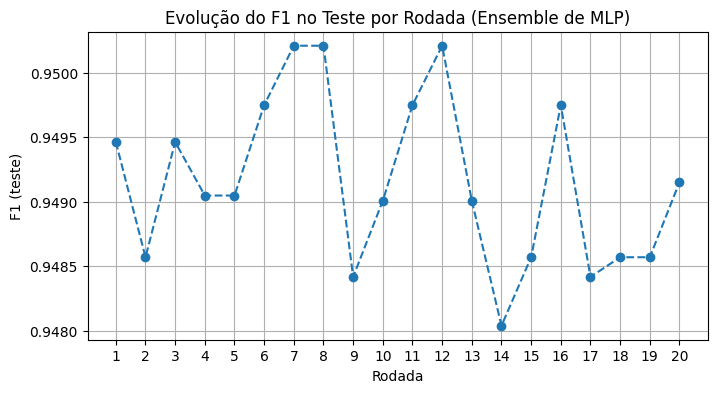

In [8]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, n_runs+1), best_scores_ensemble, marker='o', linestyle='--')
plt.title("Evolução do F1 no Teste por Rodada (Ensemble de MLP)")
plt.xlabel("Rodada")
plt.ylabel("F1 (teste)")
plt.xticks(range(1, n_runs+1))
plt.grid(True)
plt.show()


In [9]:
best_run_index = np.argmax(best_scores_ensemble)
print(f"Melhor rodada: {best_run_index + 1}")
print(f"F1 nessa rodada: {best_scores_ensemble[best_run_index]}")
print("Melhores hiperparâmetros:", best_params_ensemble[best_run_index])


Melhor rodada: 7
F1 nessa rodada: 0.9502091224386189
Melhores hiperparâmetros: {'mlp_ensemble__voting': 'soft', 'mlp_ensemble__mlp3__alpha': 0.01, 'mlp_ensemble__mlp2__alpha': 0.01, 'mlp_ensemble__mlp1__alpha': 0.001}


In [10]:
melhores_parametros = best_params_ensemble[best_run_index]

# Reconstruindo o pipeline com os hiperparâmetros otimizados
best_ensemble_pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('mlp_ensemble', VotingClassifier(
        estimators=[
            ('mlp1', MLPClassifier(hidden_layer_sizes=(50,50), alpha=melhores_parametros['mlp_ensemble__mlp1__alpha'], random_state=42)),
            ('mlp2', MLPClassifier(hidden_layer_sizes=(100,), alpha=melhores_parametros['mlp_ensemble__mlp2__alpha'], random_state=42)),
            ('mlp3', MLPClassifier(hidden_layer_sizes=(50,30), alpha=melhores_parametros['mlp_ensemble__mlp3__alpha'], random_state=42))
        ],
        voting=melhores_parametros['mlp_ensemble__voting']
    ))
])

best_ensemble_pipeline.fit(X_train, y_train)


c:\Users\iantr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('mlp_ensemble',
                 VotingClassifier(estimators=[('mlp1',
                                               MLPClassifier(alpha=0.001,
                                                             hidden_layer_sizes=(50,
                                                                                 50),
                                                             random_state=42)),
                                              ('mlp2',
                                               MLPClassifier(alpha=0.01,
                                                             random_state=42)),
                                              ('mlp3',
                                               MLPClassifier(alpha=0.01,
                                                             hidden_layer_sizes=(50,
                                                                                 30),
                                                             random_state=42))],
                                  voting='soft'))])

Desempenho no Conjunto de Teste:
Acurácia : 0.9588
Precisão : 0.9445
Recall   : 0.9565
F1-score : 0.9502
AUC      : 0.9920


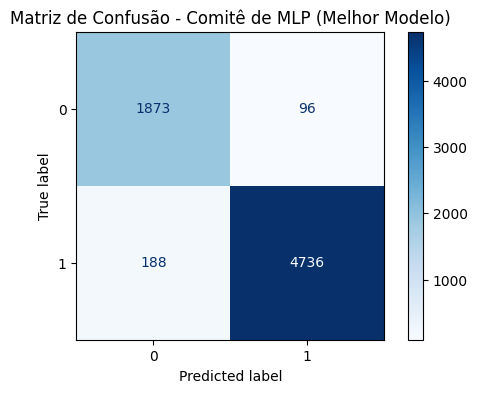

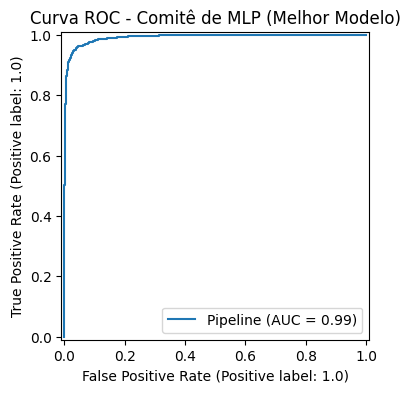


Relatório de Classificação:
              precision    recall  f1-score   support

        -1.0       0.91      0.95      0.93      1969
         1.0       0.98      0.96      0.97      4924

    accuracy                           0.96      6893
   macro avg       0.94      0.96      0.95      6893
weighted avg       0.96      0.96      0.96      6893



In [11]:
y_pred = best_ensemble_pipeline.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Desempenho no Conjunto de Teste:")
print(f"Acurácia : {acc:.4f}")
print(f"Precisão : {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")

# Cálculo de AUC (para problemas binários)
try:
    y_proba = best_ensemble_pipeline.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_proba)
    print(f"AUC      : {auc:.4f}")
except ValueError:
    print("Não foi possível calcular AUC (possivelmente problema multiclasse).")

# Plot da Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 4))
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax, cmap='Blues')
plt.title("Matriz de Confusão - Comitê de MLP (Melhor Modelo)")
plt.show()

# Plot da Curva ROC (apenas para problemas binários)
try:
    fig_roc, ax_roc = plt.subplots(figsize=(6, 4))
    RocCurveDisplay.from_estimator(best_ensemble_pipeline, X_test, y_test, ax=ax_roc)
    plt.title("Curva ROC - Comitê de MLP (Melhor Modelo)")
    plt.show()
except ValueError:
    print("Não foi possível gerar a Curva ROC (possivelmente problema multiclasse).")

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))
